# DATA ANALYSIS
In this section we gonna explore the available data.

In [2]:
from nltk.tokenize import word_tokenize
from collections import defaultdict
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import spacy
import math
import nltk
import re

source_data_path = "data/train.csv"
target_data_path = "analyzed_train.csv"
nlp = spacy.load('en_core_web_trf')

In [3]:
df = pd.read_csv(source_data_path)
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
df[['target']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
target,7613.0,0.42966,0.49506,0.0,0.0,0.0,1.0,1.0


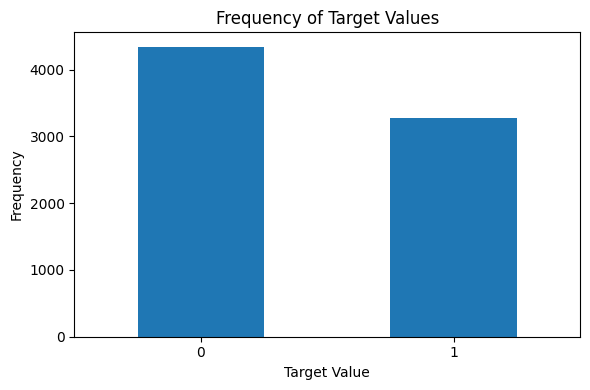

In [6]:
# Count the frequency of each target value
target_counts = df['target'].value_counts()

# Plot the bar chart
plt.figure(figsize=(6, 4))
target_counts.plot(kind='bar')
plt.title('Frequency of Target Values')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

In [7]:
df['keyword'].nunique()

221

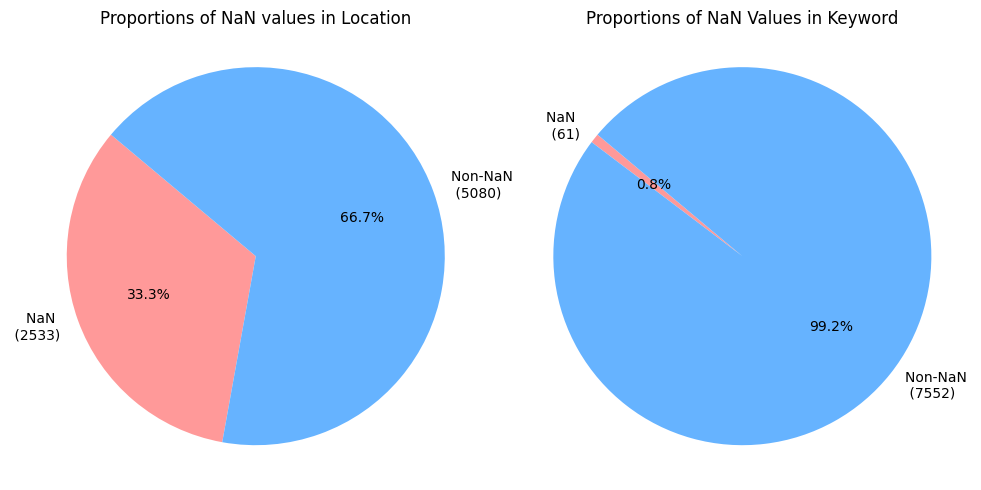

In [8]:
import matplotlib.pyplot as plt

# Count NaN values in 'location' and 'keyword' columns
nan_location_count = df['location'].isna().sum()
nan_keyword_count = df['keyword'].isna().sum()

# Count non-NaN values in 'location' and 'keyword' columns
non_nan_location_count = df['location'].notna().sum()
non_nan_keyword_count = df['keyword'].notna().sum()

# Create labels for the pie charts
labels_location = [f'NaN \n ({nan_location_count})', f'Non-NaN \n ({non_nan_location_count})']
labels_keyword = [f'NaN \n ({nan_keyword_count})', f'Non-NaN \n ({non_nan_keyword_count})']

# Create data for the pie charts
sizes_location = [nan_location_count, non_nan_location_count]
sizes_keyword = [nan_keyword_count, non_nan_keyword_count]

# Create colors for different sections of the pie charts
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Plot the pie chart for 'location' column
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(sizes_location, labels=labels_location, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Proportions of NaN values in Location')


# Plot the pie chart for 'keyword' column
plt.subplot(1, 2, 2)
plt.pie(sizes_keyword, labels=labels_keyword, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Proportions of NaN Values in Keyword')

# Adjust layout
plt.tight_layout()

# Show the pie charts
plt.show()


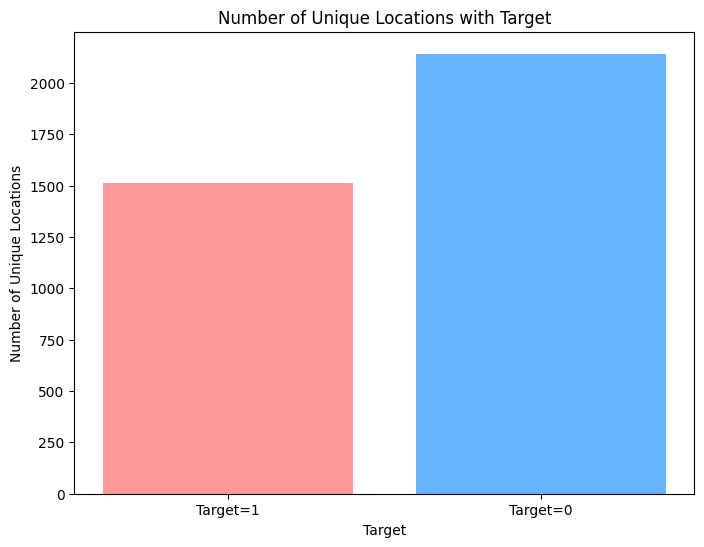

In [9]:
# Get unique locations with target equal to 1
unique_locations_target_one = df[df['target'] == 1]['location'].nunique()

# Get unique locations with target equal to 0
unique_locations_target_zero = df[df['target'] == 0]['location'].nunique()

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.bar(['Target=1', 'Target=0'], [unique_locations_target_one, unique_locations_target_zero], color=['#ff9999', '#66b3ff'])
plt.title('Number of Unique Locations with Target')
plt.xlabel('Target')
plt.ylabel('Number of Unique Locations')
plt.show()

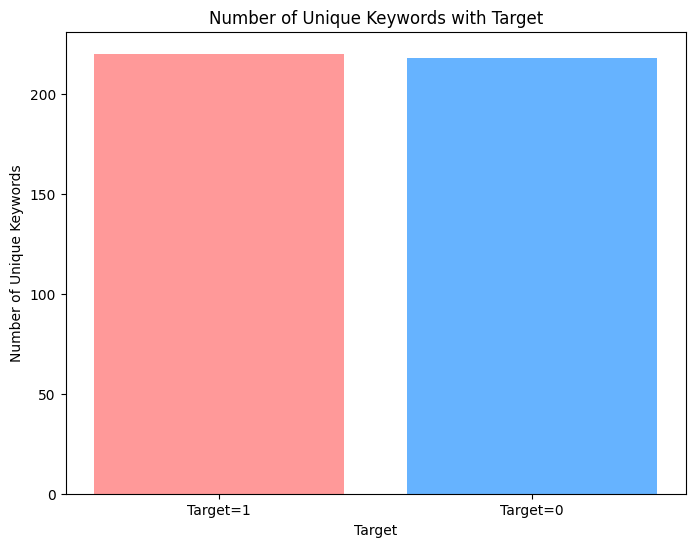

In [10]:
# Get unique locations with target equal to 1
unique_keywords_target_one = df[df['target'] == 1]['keyword'].nunique()

# Get unique locations with target equal to 0
unique_keywords_target_zero = df[df['target'] == 0]['keyword'].nunique()

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.bar(['Target=1', 'Target=0'], [unique_keywords_target_one, unique_keywords_target_zero], color=['#ff9999', '#66b3ff'])
plt.title('Number of Unique Keywords with Target')
plt.xlabel('Target')
plt.ylabel('Number of Unique Keywords')
plt.show()

In [11]:
# Calculate the length of each text and create a new column 'text_length'
df['text_length'] = df['text'].apply(len)

# Calculate the average and maximum text length
average_text_length = df['text_length'].mean()
max_text_length = df['text_length'].max()

print("Average text length:", average_text_length)
print("Maximum text length:", max_text_length)

Average text length: 101.03743596479706
Maximum text length: 157


target
0     95.706817
1    108.113421
Name: text_length, dtype: float64


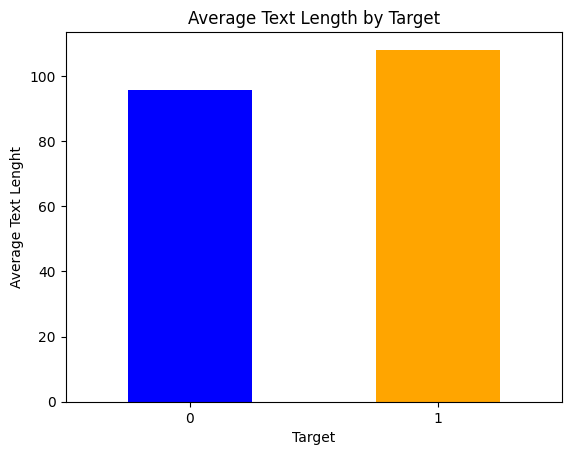

In [12]:
average_text_len_targer = df.groupby('target')['text_length'].mean()

print(average_text_len_targer)

# Plot the average word count in a histogram
average_text_len_targer.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Text Length by Target')
plt.xlabel('Target')
plt.ylabel('Average Text Lenght')
plt.xticks(rotation=0)
plt.show()

<Figure size 1900x1000 with 0 Axes>

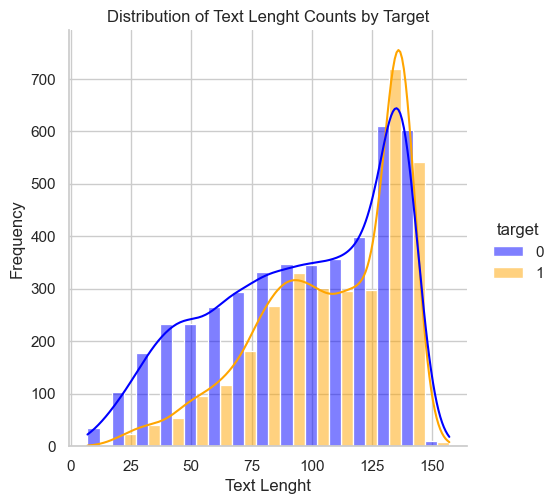

In [13]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(19, 10))
sns.displot(data= df, x='text_length', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'], binwidth=10)
plt.title('Distribution of Text Lenght Counts by Target')
plt.xlabel('Text Lenght')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Function to calculate word count
def word_count(text):
    return len(text.split())

# Apply the function to each row of the 'text' column
df['word_count'] = df['text'].apply(lambda x: word_count(x))

# Display the DataFrame
df

,id,keyword,location,text,target,text_length,word_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19


target
0    14.704744
1    15.167533
Name: word_count, dtype: float64


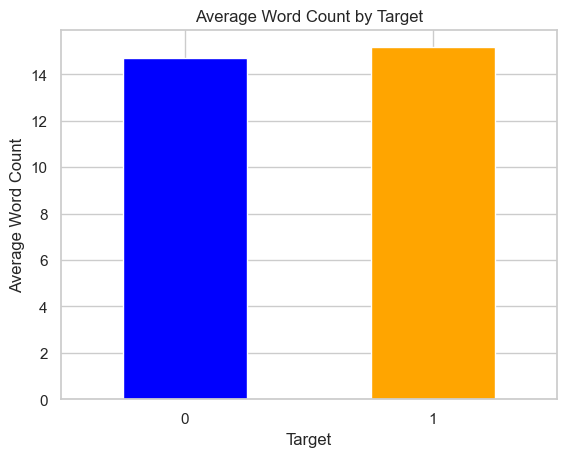

In [15]:
# Calculate the average word count by target
average_word_count = df.groupby('target')['word_count'].mean()
print(average_word_count)

# Plot the average word count in a histogram
average_word_count.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Word Count by Target')
plt.xlabel('Target')
plt.ylabel('Average Word Count')
plt.xticks(rotation=0)
plt.show()

<Figure size 1900x1000 with 0 Axes>

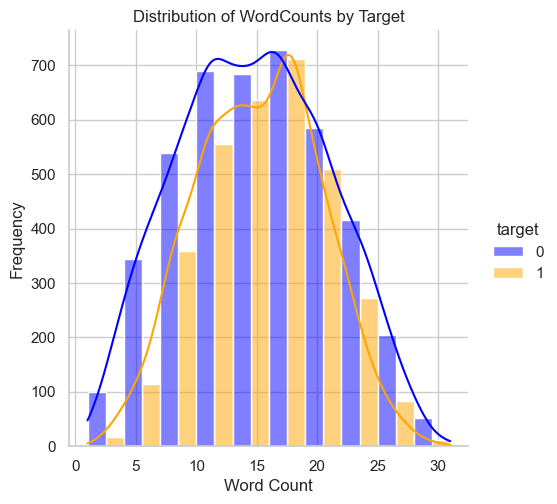

In [16]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(19, 10))
sns.displot(data= df, x='word_count', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'], binwidth=3)
plt.title('Distribution of WordCounts by Target')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Download NLTK stop words data
nltk.download('stopwords')

# Load stop words
stop_words = set(stopwords.words('english'))

# Function to calculate stop word ratio
def stop_word_ratio(text):
    words = text.split()
    num_stop_words = sum(1 for word in words if word.lower() in stop_words)
    return num_stop_words / len(words) if len(words) > 0 else 0

# Apply the function to each row of the 'text' column
df['stop_word_ratio'] = df['text'].apply(stop_word_ratio)

df

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michelemattiello/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,id,keyword,location,text,target,text_length,word_count,stop_word_ratio
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,0.461538
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,0.000000
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,0.500000
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,0.125000
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,0.437500
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11,0.181818
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20,0.450000
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8,0.250000
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19,0.263158


target
0    0.302456
1    0.252516
Name: stop_word_ratio, dtype: float64


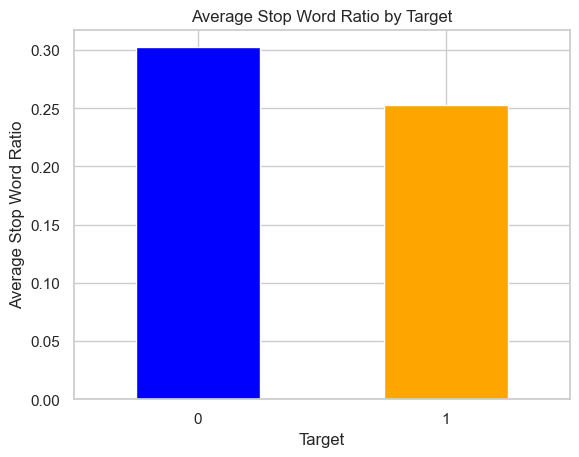

In [18]:
# Calculate the average stop word ratio by target
average_stop_word_ratio = df.groupby('target')['stop_word_ratio'].mean()
print(average_stop_word_ratio)

average_stop_word_ratio.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Stop Word Ratio by Target')
plt.xlabel('Target')
plt.ylabel('Average Stop Word Ratio')
plt.xticks(rotation=0)
plt.show()

<Figure size 1900x1000 with 0 Axes>

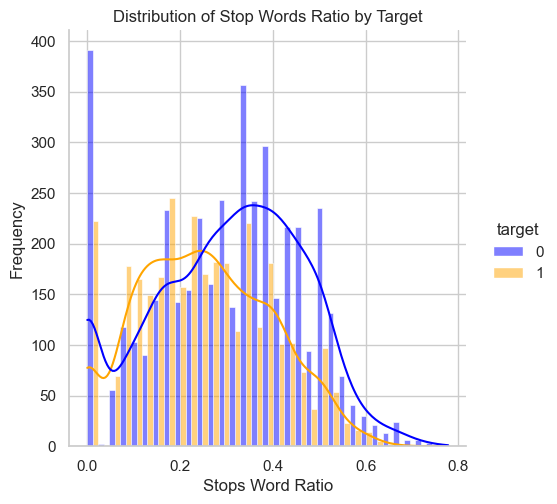

In [19]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(19, 10))
sns.displot(data= df, x='stop_word_ratio', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'])
plt.title('Distribution of Stop Words Ratio by Target')
plt.xlabel('Stops Word Ratio')
plt.ylabel('Frequency')
plt.show()

In [20]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/michelemattiello/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/michelemattiello/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/michelemattiello/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/michelemattiello/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/michelemattiello/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/michelemattiello/nltk_data...
[nltk_data]    |   Unzipping co

True

In [21]:
# Function to calculate unique word count
def unique_word_count(text):
    words = word_tokenize(text.lower())  # Tokenize text and convert to lowercase
    unique_words = set(words)
    return len(unique_words)

# Apply the function to each row of the 'text' column
df['unique_word_count'] = df['text'].apply(unique_word_count)

df

,id,keyword,location,text,target,text_length,word_count,stop_word_ratio,unique_word_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,0.461538,14
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,0.000000,8
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,0.500000,21
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,0.125000,9
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,0.437500,16
...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11,0.181818,13
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20,0.450000,18
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8,0.250000,15
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19,0.263158,19


target
0    16.542377
1    17.335983
Name: unique_word_count, dtype: float64


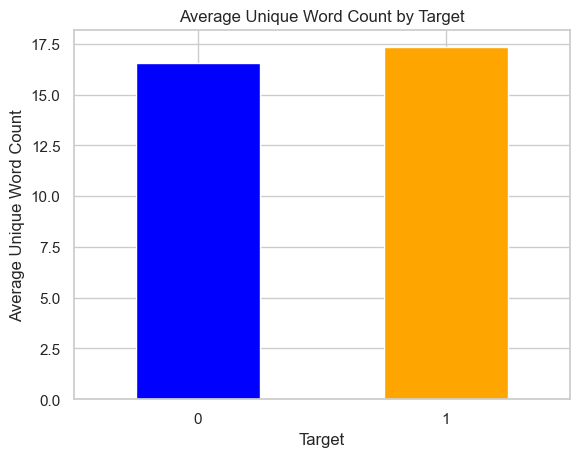

In [22]:
# Calculate the average unique word count by target
average_unique_word_count = df.groupby('target')['unique_word_count'].mean()

# Display the average unique word count
print(average_unique_word_count)

average_unique_word_count.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Unique Word Count by Target')
plt.xlabel('Target')
plt.ylabel('Average Unique Word Count')
plt.xticks(rotation=0)
plt.show()

<Figure size 1900x1000 with 0 Axes>

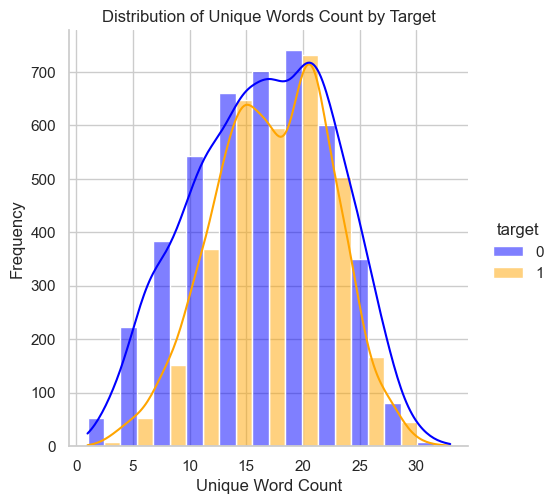

In [23]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(19, 10))
sns.displot(data= df, x='unique_word_count', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'], binwidth=3)
plt.title('Distribution of Unique Words Count by Target')
plt.xlabel('Unique Word Count')
plt.ylabel('Frequency')
plt.show()

In [24]:
# Function to calculate Type-Token Ratio (TTR)
def ttr(text):
    words = word_tokenize(text.lower())  # Tokenize text and convert to lowercase
    total_words = len(words)
    unique_words = set(words)
    total_unique_words = len(unique_words)
    if total_words > 0:
        return total_unique_words / total_words
    else:
        return 0

# Apply the function to each row of the 'text' column
df['ttr'] = df['text'].apply(ttr)

df

,id,keyword,location,text,target,text_length,word_count,stop_word_ratio,unique_word_count,ttr
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,0.461538,14,1.000000
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,0.000000,8,1.000000
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,0.500000,21,0.875000
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,0.125000,9,1.000000
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,0.437500,16,0.888889
...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11,0.181818,13,1.000000
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20,0.450000,18,0.750000
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8,0.250000,15,1.000000
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19,0.263158,19,0.904762


target
0    0.902543
1    0.911844
Name: ttr, dtype: float64


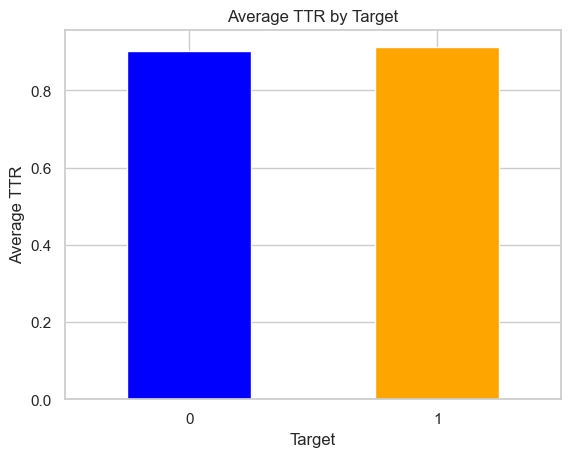

In [25]:
average_ttr = df.groupby('target')['ttr'].mean()

# Display the average ttr 
print(average_ttr)

average_ttr.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average TTR by Target')
plt.xlabel('Target')
plt.ylabel('Average TTR')
plt.xticks(rotation=0)
plt.show()

<Figure size 1900x1000 with 0 Axes>

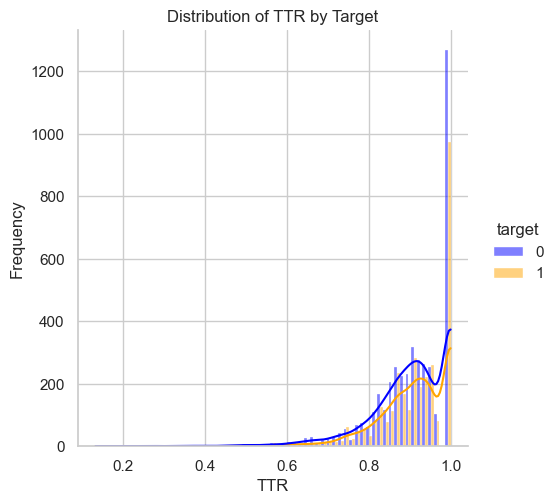

In [26]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(19, 10))
sns.displot(data= df, x='ttr', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'])
plt.title('Distribution of TTR by Target')
plt.xlabel('TTR')
plt.ylabel('Frequency')
plt.show()

In [27]:
# Function to calculate Shannon entropy
def entropy(text):
    # Count the occurrences of each character in the text
    counts = Counter(text.lower())
    # Total number of characters
    total_chars = sum(counts.values())
    # Calculate the probability of each character
    probs = [count / total_chars for count in counts.values()]
    # Calculate Shannon entropy
    entropy = -np.sum([prob * np.log2(prob) for prob in probs])
    return entropy

# Apply the function to each row of the 'text' column
df['entropy'] = df['text'].apply(entropy)

# Display the DataFrame
df

,id,keyword,location,text,target,text_length,word_count,stop_word_ratio,unique_word_count,ttr,entropy
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,0.461538,14,1.000000,3.932597
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,0.000000,8,1.000000,3.655051
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,0.500000,21,0.875000,4.016236
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,0.125000,9,1.000000,4.110357
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,0.437500,16,0.888889,4.084352
...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11,0.181818,13,1.000000,4.358793
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20,0.450000,18,0.750000,4.047573
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8,0.250000,15,1.000000,4.824055
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19,0.263158,19,0.904762,4.118722


target
0    4.215828
1    4.342451
Name: entropy, dtype: float64


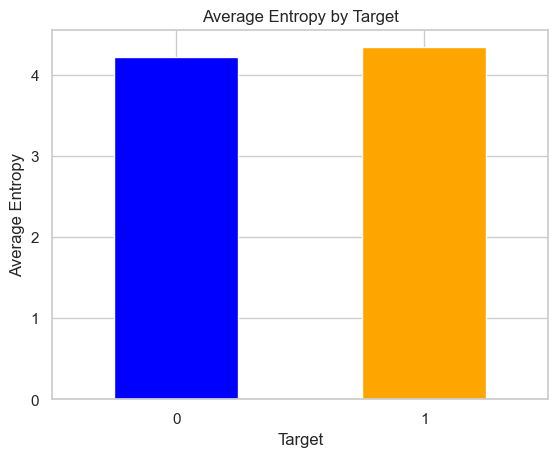

In [28]:
average_entropy = df.groupby('target')['entropy'].mean()

print(average_entropy)

average_entropy.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Entropy by Target')
plt.xlabel('Target')
plt.ylabel('Average Entropy')
plt.xticks(rotation=0)
plt.show()

<Figure size 1900x1000 with 0 Axes>

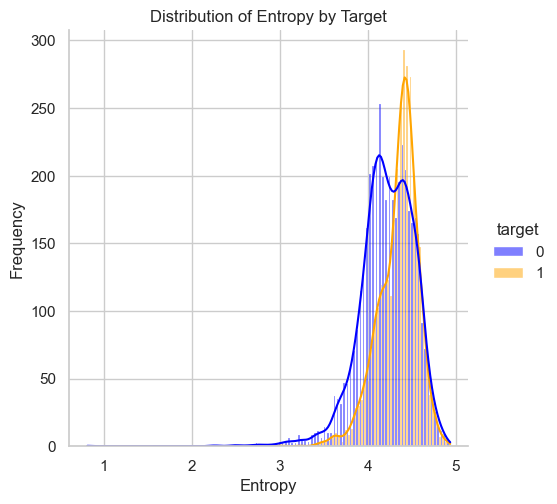

In [29]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(19, 10))
sns.displot(data= df, x='entropy', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'])
plt.title('Distribution of Entropy by Target')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.show()

In [30]:
import string

# Function to count punctuation symbols
def punctuation_count(text):
    # Define punctuation characters
    punctuation_chars = set(string.punctuation)
    # Count occurrences of punctuation symbols in the text
    punctuation_count = sum(1 for char in text if char in punctuation_chars)
    return punctuation_count

# Apply the function to each row of the 'text' column
df['punctuation_count'] = df['text'].apply(punctuation_count)
df

,id,keyword,location,text,target,text_length,word_count,stop_word_ratio,unique_word_count,ttr,entropy,punctuation_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,0.461538,14,1.000000,3.932597,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,0.000000,8,1.000000,3.655051,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,0.500000,21,0.875000,4.016236,3
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,0.125000,9,1.000000,4.110357,2
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,0.437500,16,0.888889,4.084352,2
...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11,0.181818,13,1.000000,4.358793,5
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20,0.450000,18,0.750000,4.047573,5
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8,0.250000,15,1.000000,4.824055,11
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19,0.263158,19,0.904762,4.118722,5


target
0    6.309074
1    7.543565
Name: punctuation_count, dtype: float64


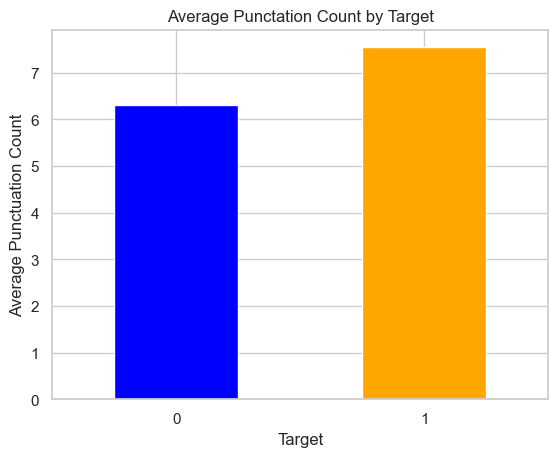

In [31]:
average_punctuation = df.groupby('target')['punctuation_count'].mean()

print(average_punctuation)

average_punctuation.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Punctation Count by Target')
plt.xlabel('Target')
plt.ylabel('Average Punctuation Count')
plt.xticks(rotation=0)
plt.show()

<Figure size 1900x1000 with 0 Axes>

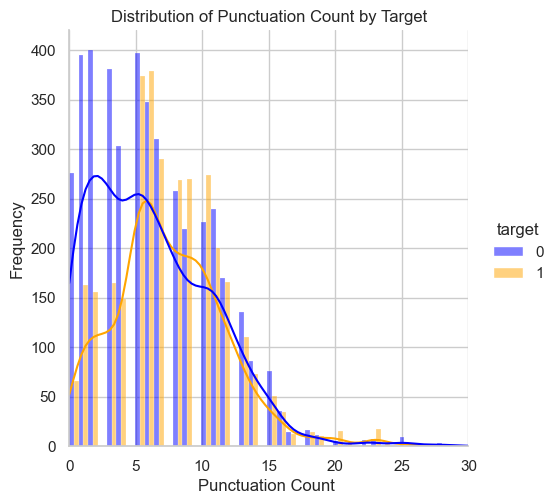

In [32]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(19, 10))
sns.displot(data= df, x='punctuation_count', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'])
plt.xlim(0, 30)
plt.title('Distribution of Punctuation Count by Target')
plt.xlabel('Punctuation Count ')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Function to count named entities
def ner_count(text):
    doc = nlp(text)
    # Count unique named entities
    entities = set([ent.label_ for ent in doc.ents])
    return len(entities)

# Apply the function to each row of the 'text' column
df['ner_count'] = df['text'].apply(ner_count)

# Display the DataFrame
df

In [ ]:
average_ner = df.groupby('target')['ner_count'].mean()

print(average_ner)

average_ner.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average NER Count by Target')
plt.xlabel('Target')
plt.ylabel('Average NER Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Plot the distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.displot(data= df, x='ner_count', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'], discrete = True)
plt.xlim(0, 5)
plt.title('Distribution of NER Count by Target')
plt.xlabel('NER Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Function to count POS tags
def pos_count(text, pos_tags):
    doc = nlp(text)
    pos_counts = 0
    for token in doc:
        if token.pos_ in pos_tags:
            pos_counts += 1
    return pos_counts

# Define the POS tags you want to count
pos_tags = ['NOUN', 'ADJ', 'VERB', 'ADP', 'PRON']

# Apply the function to each row of the 'text' column
df['tot_pos_counts'] = df['text'].apply(lambda x: pos_count(x, pos_tags))
df['NOUN_counts'] = df['text'].apply(lambda x: pos_count(x, ['NOUN']))
df['ADJ_counts'] = df['text'].apply(lambda x: pos_count(x, ['ADJ']))
df['VERB_counts'] = df['text'].apply(lambda x: pos_count(x, ['VERB']))
df['ADP_counts'] = df['text'].apply(lambda x: pos_count(x, ['ADP']))
df['PRON_counts'] = df['text'].apply(lambda x: pos_count(x, ['PRON']))

df

In [ ]:
average_tot_pos = df.groupby('target')['tot_pos_counts'].mean()

print(average_tot_pos)

average_tot_pos.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Total POS Count by Target')
plt.xlabel('Target')
plt.ylabel('Average Total POS Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Plot the distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.displot(data= df, x='tot_pos_counts', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'])
plt.title('Distribution of Total POS Count by Target')
plt.xlabel('POS Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
average_nouns = df.groupby('target')['NOUN_counts'].mean()

print(average_nouns)

average_nouns.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average NOUN Count by Target')
plt.xlabel('Target')
plt.ylabel('Average NOUN Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Plot the distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.displot(data= df, x='NOUN_counts', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'], binwidth = 1)
plt.xlim(0, 15)
plt.title('Distribution of NOUN Count by Target')
plt.xlabel('NOUN Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
average_adj = df.groupby('target')['ADJ_counts'].mean()

print(average_adj)

average_adj.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average ADJ Count by Target')
plt.xlabel('Target')
plt.ylabel('Average ADJ Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Plot the distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.displot(data= df, x='ADJ_counts', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'], binwidth = 1)
plt.xlim(0, 6)
plt.title('Distribution of ADJ Count by Target')
plt.xlabel('ADJ Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
average_verb = df.groupby('target')['VERB_counts'].mean()

print(average_verb)

average_verb.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average VERB Count by Target')
plt.xlabel('Target')
plt.ylabel('Average VERB Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Plot the distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.displot(data= df, x='VERB_counts', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'], binwidth = 1)
plt.xlim(0, 7)
plt.title('Distribution of VERB Count by Target')
plt.xlabel('VERB Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
average_adp = df.groupby('target')['ADP_counts'].mean()

print(average_adp)

average_adp.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average ADP Count by Target')
plt.xlabel('Target')
plt.ylabel('Average ADP Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Plot the distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.displot(data= df, x='ADP_counts', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'], binwidth = 1)
plt.xlim(0, 6)
plt.title('Distribution of ADP Count by Target')
plt.xlabel('ADP Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
average_pron = df.groupby('target')['PRON_counts'].mean()

print(average_pron)

average_pron.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average PRON Count by Target')
plt.xlabel('Target')
plt.ylabel('Average PRON Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Plot the distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.displot(data= df, x='PRON_counts', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'], binwidth = 1)
plt.xlim(0, 6)
plt.title('Distribution of PRON Count by Target')
plt.xlabel('PRON Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Function to count subordinate clauses
def count_subordinate_clauses(text):
    doc = nlp(text)
    # Initialize counter for subordinate clauses
    subordinate_clause_count = 0
    # Iterate over the tokens in the document
    for token in doc:
        # Check if the token is a subordinating conjunction or a dependent marker
        if token.dep_ in ['mark', 'advcl', 'ccomp']:
            subordinate_clause_count += 1
    return subordinate_clause_count

# Apply the function to each row of the 'text' column
df['subordinate_clause_count'] = df['text'].apply(count_subordinate_clauses)

df

In [ ]:
average_subordinate = df.groupby('target')['subordinate_clause_count'].mean()

print(average_subordinate)

average_subordinate.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Subordinate Clauses by Target')
plt.xlabel('Target')
plt.ylabel('Average Subordinate Clauses')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Plot the distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.displot(data= df, x='subordinate_clause_count', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'])
plt.xlim(0, 6)
plt.title('Distribution of Subordinate Clause Count by Target')
plt.xlabel('Subordinate Clause Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
from scipy.special import softmax
from tqdm.notebook import tqdm
import numpy as np

# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

def get_scores(scores):
    score = dict()
    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    for i in range(scores.shape[0]):
        l = config.id2label[ranking[i]]
        s = scores[ranking[i]]
        score[l] = np.round(float(s), 4)

    return score


df["positive"] = 0
df["neutral"] = 0
df["negative"] = 0


for i in tqdm(df.index):
    text = df["text"][i]
    text = preprocess(text)
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    dict_scores = get_scores(scores)
    df["positive"][i] = dict_scores["positive"]
    df["neutral"][i] = dict_scores["neutral"]
    df["negative"][i] = dict_scores["negative"]

df

In [ ]:
# Calculate average sentiment scores for each target group
average_scores = df.groupby('target')[['positive', 'neutral', 'negative',]].mean()

# Plot the average sentiment scores
average_scores.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Target')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score by Target')
plt.xticks([0, 1], ['Target 0', 'Target 1'], rotation=0)
plt.legend(title='Sentiment')
plt.show()

In [ ]:
# Function to count numbers
def count_numbers(text):
    numbers = sum(c.isdigit() for c in text)
    return numbers

# Apply the function to each row of the 'text' column
df['number_count'] = df['text'].apply(count_numbers)

df

In [ ]:
# Calculate the average number count by target
average_number_count = df.groupby('target')['number_count'].mean()

print(average_number_count)

# Plot the average number count
average_number_count.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Number Count by Target')
plt.xlabel('Target')
plt.ylabel('Average Number Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Plot the distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.displot(data= df, x='number_count', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'], binwidth = 2)
plt.xlim(0, 20)
plt.title('Distribution of Number Count by Target')
plt.xlabel('Number Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
N = 100

STOPWORDS = set(stopwords.words('english'))

def generate_ngrams(text, n_gram=1):
    tokens = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[tokens[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]
        
# Unigrams
disaster_unigrams = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

for tweet in df[df['target'] == 1]['text']:
    for word in generate_ngrams(tweet):
        disaster_unigrams[word] += 1
        
for tweet in df[df['target'] == 0]['text']:
    for word in generate_ngrams(tweet):
        nondisaster_unigrams[word] += 1
        
df_disaster_unigrams = pd.DataFrame(sorted(disaster_unigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_unigrams = pd.DataFrame(sorted(nondisaster_unigrams.items(), key=lambda x: x[1])[::-1])

# Bigrams
disaster_bigrams = defaultdict(int)
nondisaster_bigrams = defaultdict(int)

for tweet in df[df['target'] == 1]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        disaster_bigrams[word] += 1
        
for tweet in df[df['target'] == 0]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        nondisaster_bigrams[word] += 1
        
df_disaster_bigrams = pd.DataFrame(sorted(disaster_bigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_bigrams = pd.DataFrame(sorted(nondisaster_bigrams.items(), key=lambda x: x[1])[::-1])

# Trigrams
disaster_trigrams = defaultdict(int)
nondisaster_trigrams = defaultdict(int)

for tweet in df[df['target'] == 1]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        disaster_trigrams[word] += 1
        
for tweet in df[df['target'] == 0]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        nondisaster_trigrams[word] += 1
        
df_disaster_trigrams = pd.DataFrame(sorted(disaster_trigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_trigrams = pd.DataFrame(sorted(nondisaster_trigrams.items(), key=lambda x: x[1])[::-1])

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_unigrams[0].values[:N], x=df_disaster_unigrams[1].values[:N], ax=axes[0], color='blue')
sns.barplot(y=df_nondisaster_unigrams[0].values[:N], x=df_nondisaster_unigrams[1].values[:N], ax=axes[1], color='orange')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in Non-disaster Tweets', fontsize=15)

plt.show()

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_bigrams[0].values[:N], x=df_disaster_bigrams[1].values[:N], ax=axes[0], color='blue')
sns.barplot(y=df_nondisaster_bigrams[0].values[:N], x=df_nondisaster_bigrams[1].values[:N], ax=axes[1], color='orange')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in Non-disaster Tweets', fontsize=15)

plt.show()

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 50), dpi=100)

sns.barplot(y=df_disaster_trigrams[0].values[:N], x=df_disaster_trigrams[1].values[:N], ax=axes[0], color='blue')
sns.barplot(y=df_nondisaster_trigrams[0].values[:N], x=df_nondisaster_trigrams[1].values[:N], ax=axes[1], color='orange')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=11)

axes[0].set_title(f'Top {N} most common trigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common trigrams in Non-disaster Tweets', fontsize=15)

plt.show()

In [ ]:
# Function to count URLs in a given text
def count_urls(text):
    url_pattern = r'(https?://)?(www\.)?\S+\.\S+'
    urls = re.findall(url_pattern, text)
    return len(urls)

# Applying the function to the 'text' column
df['url_count'] = df['text'].apply(count_urls)
df

In [ ]:
average_urls = df.groupby('target')['url_count'].mean()

print(average_urls)

average_urls.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average URLs Count by Target')
plt.xlabel('Target')
plt.ylabel('Average URLs Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Plot the distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.displot(data= df, x='url_count', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'], binwidth = 1)
plt.title('Distribution of URL Count by Target')
plt.xlabel('URL Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
def count_hashtags(text):
    hashtag_pattern = r'#\w+'
    hashtags = re.findall(hashtag_pattern, text)
    return len(hashtags)

# Applying the function to the 'text' column
df['hashtag_count'] = df['text'].apply(count_hashtags)
df

In [ ]:
average_hashtags = df.groupby('target')['hashtag_count'].mean()

print(average_hashtags)

average_hashtags.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Hashtags Count by Target')
plt.xlabel('Target')
plt.ylabel('Average Hashtags Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Plot the distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.displot(data= df, x='hashtag_count', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'])
plt.xlim(0, 8)
plt.title('Distribution of Hashtag Count by Target')
plt.xlabel('Hashtag Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.to_csv(target_data_path)


# DATA PROCESSING

In this section we process the data

In [ ]:
from nltk.stem import WordNetLemmatizer
from geopy.geocoders import Nominatim
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from spacy.tokens import Doc
from typing import List
from tqdm import tqdm
import contractions
import pandas as pd
import spacy
import math
import json
import re
import os

source_data_path = 'analyzed_train.csv'
processed_data_path_one = 'data-to-train/preprocess_one.csv'
processed_data_path_two = 'data-to-train/preprocess_two.csv'
processed_data_path_one_scaled = 'data-to-train/preprocess_one_scaled.csv'
processed_data_path_two_scaled = 'data-to-train/preprocess_two_scaled.csv'
df = pd.read_csv(source_data_path)

In [ ]:
class SpaCyPreProcessor:

    def __init__(self, spacy_model = None, remove_numbers = False, remove_special = False, pos_to_remove = None, remove_stop_words = False, lemmatize = False, use_gpu = False, remove_urls = False, expand_contractions = False) -> None:
        
        self.__remove_numbers = remove_numbers
        self.__remove_special = remove_special
        self.__pos_to_remove = pos_to_remove
        self.__remove_stop_words = remove_stop_words
        self.__lemmatize = lemmatize
        self.__remove_urls = remove_urls
        self.__expand_contractions = expand_contractions

        if spacy_model is None:
            self.model = spacy.load("en_core_web_sm")
        else:
            self.model = spacy_model

        if use_gpu:
            spacy.prefer_gpu()

    @staticmethod
    def download_spacy_model(model="en_core_web_sm"):
        print(f"Downloading spaCy model {model}")
        spacy.cli.download(model)
        print(f"Finished downloading model")

    @staticmethod
    def load_model(model="en_core_web_sm"):
        return spacy.load(model, disable=["ner", "parser"])

    def tokenize(self, text) -> List[str]:
        """
        Tokenize text using a spaCy pipeline
        :param text: Text to tokenize
        :return: list of str
        """
        doc = self.model(text)
        return [token.text for token in doc]

    def preprocess_text(self, text) -> str:
        """
        Runs a spaCy pipeline and removes unwanted parts from text
        :param text: text string to clean
        :return: str, clean text
        """
        if self.__remove_urls:
            text = self.remove_urls(text)
        if self.__expand_contractions:
            text = self.expand_contractions(text)
        
        doc = self.model(text)
        return self.__clean(doc)

    def preprocess_text_list(self, texts=List[str]) -> List[str]:
        """
        Runs a spaCy pipeline and removes unwanted parts from a list of text.
        Leverages spaCy's `pipe` for faster batch processing.
        :param texts: List of texts to clean
        :return: List of clean texts
        """
        clean_texts = []
        for doc in tqdm(self.model.pipe(texts)):
            clean_texts.append(self.__clean(doc))

        return clean_texts

    def __clean(self, doc: Doc) -> str:

        tokens = []
        # POS Tags removal
        if self.__pos_to_remove:
            for token in doc:
                if token.pos_ not in self.__pos_to_remove:
                    tokens.append(token)
        else:
            tokens = doc

        # Remove Numbers
        if self.__remove_numbers:
            tokens = [
                token for token in tokens if not (token.like_num or token.is_currency)
            ]

        # Remove Stopwords
        if self.__remove_stop_words:
            tokens = [token for token in tokens if not token.is_stop]
        
        # remove unwanted tokens
        tokens = [
            token
            for token in tokens
            if not (
                token.is_punct or token.is_space or token.is_quote or token.is_bracket
            )
        ]

        # Remove empty tokens
        tokens = [token for token in tokens if token.text.strip() != ""]

        # Lemmatize
        if self.__lemmatize:
            text = " ".join([token.lemma_ for token in tokens])
        else:
            text = " ".join([token.text for token in tokens])

        if self.__remove_special:
            text.replace("#", "")
            text.replace("@", "")
            # Remove non alphabetic characters
            text = re.sub(r"[^a-zA-Z0-9\']", " ", text)
        
        # remove non-Unicode characters
        text = re.sub(r"[^\x00-\x7F]+", "", text)

        text = text.lower()

        return text

    @staticmethod
    def remove_urls(text):
        """
        Removes URLs from a text string
        :param text: input text
        :return: text with URLs removed
        """
        url_pattern = re.compile(r'https?://\S+|www\.\S+')
        return url_pattern.sub(r'', text)

    @staticmethod
    def expand_contractions(text):
        """
        Expands contractions in a text string
        :param text: input text
        :return: text with contractions expanded
        """
        return contractions.fix(text)

In [ ]:
lemmatizer = WordNetLemmatizer()
keywords = list(set(df[df['keyword'].notna()]['keyword']))
keywords_lemmatized = [lemmatizer.lemmatize(word).lower() for word in keywords]
filtered_df = df[df['keyword'].isna()]
texts_without_keyword = filtered_df['text']
ids_without_keyword = filtered_df['id']
pattern = r'\#\w+'
extracted_words = []

for id, text in zip(ids_without_keyword, texts_without_keyword):
    matches = re.findall(pattern, text)
    for match in matches:
        word = re.search(r'\w+', match).group()
        if word in keywords or lemmatizer.lemmatize(word).lower() in keywords_lemmatized:
            row_index = df.index[df['id'] == id].tolist()[0]
            df['keyword'][row_index] = word
            extracted_words.append(word)
        else:
            keywords = df.loc[df['keyword'].notna() & df['text'].str.contains(word), 'keyword'].tolist()
            if len(keywords) == 1:
                row_index = df.index[df['id'] == id].tolist()[0]
                df['keyword'][row_index] = keywords[0]
df.loc[df['keyword'].isna(), 'keyword'] = 'NONE'

In [ ]:
SpaCyPreProcessor.download_spacy_model('en_core_web_trf')

pipeline 1

In [ ]:
spacy_model = SpaCyPreProcessor.load_model('en_core_web_trf')
preprocessing_pipeline = SpaCyPreProcessor(spacy_model=spacy_model, remove_numbers=True, remove_special=True, remove_stop_words=True, lemmatize=True, use_gpu=True, expand_contractions=True, remove_urls=True)

df['cleaned_text'] = ''
df['cleaned_keyword'] = ''

for i in tqdm(df.index):
    df['cleaned_text'][i] = preprocessing_pipeline.preprocess_text(df['text'][i])
    df['cleaned_keyword'][i] = preprocessing_pipeline.preprocess_text(df['keyword'][i])
    
df.loc[df['cleaned_keyword'] == '', 'cleaned_keyword'] = 'none'    
    
df.to_csv(processed_data_path_one)

pipeline 2

In [ ]:
spacy_model = SpaCyPreProcessor.load_model('en_core_web_trf')
preprocessing_pipeline = SpaCyPreProcessor(spacy_model=spacy_model, remove_numbers=False, remove_special=True, remove_stop_words=True, lemmatize=True, use_gpu=False, expand_contractions=True, remove_urls=True)

df['cleaned_text'] = ''
df['cleaned_keyword'] = ''

for i in tqdm(df.index):
    df['cleaned_text'][i] = preprocessing_pipeline.preprocess_text(df['text'][i])
    df['cleaned_keyword'][i] = preprocessing_pipeline.preprocess_text(df['keyword'][i])
    
df.loc[df['cleaned_keyword'] == '', 'cleaned_keyword'] = 'none'
df.to_csv(processed_data_path_two)

Scale features

In [2]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['hashtag_count', 'url_count', 'positive', 'neutral', 'negative', 'ner_count']

df1 = pd.read_csv(processed_data_path_one)
df2 = pd.read_csv(processed_data_path_two)

scaler = StandardScaler()

df1[columns_to_scale] = scaler.fit_transform(df1[columns_to_scale])
df2[columns_to_scale] = scaler.fit_transform(df2[columns_to_scale])

df1.to_csv(processed_data_path_one_scaled)
df2.to_csv(processed_data_path_two_scaled)

### we search country for all locations to group tweets

In [ ]:
df = pd.read_csv(processed_data_path_one)
nlp = spacy.load('en_core_web_trf')
locations = df[df['location'].notna()]['location'].tolist()
results = None
arg = (locations, 0, len(locations))

In [ ]:
class Geolocator:

    def __init__(self):
        self.geolocator = Nominatim(user_agent=f"track")

    def get_country(self, location):
        country = 'nan'
        if location != 'nan':
            geocode = self.geolocator.geocode(location)
            if geocode:
                country = geocode.address.split(',')[-1]
        return country


In [ ]:
def update_countries_found(location, country, countries_found = []):
    check = False
    for i in range(len(countries_found)):
        if countries_found[i]["country"] == country:
            countries_found[i]["locations"].append(location)
            check = True
    if check == False:
        countries_found.append({
            "locations": [location],
            "country": country
        })
    return countries_found

In [ ]:
def get_countries(locations, start, end, countries_found = None):
    if countries_found == None:
        countries_found = []
    index = 0
    cicle = None
    try:
        geolocator = Geolocator()
        cicle = range(start, end) if end < len(locations) else range(start, len(locations))
        for i in tqdm(cicle):
            country = geolocator.get_country(str(locations[i]))
            countries_found = update_countries_found(locations[i], country, countries_found)
            index = i
        return countries_found, end, end
    except Exception as e:
        print(e)
        return countries_found, index, end

In [ ]:
checkpoint_path = "./locations_checkpoint.json"

if os.path.isfile(checkpoint_path):
    with open(checkpoint_path, 'r') as openfile:
        results = json.load(openfile)

results = get_countries(*arg, results[0] if results else None)
if int(results[-2]) != int(results[-1]):
    arg = (locations, int(results[-2]), int(results[-1]))

with open(checkpoint_path, 'w') as openfile:
    json.dump(results, openfile)

In [ ]:
if os.path.isfile(checkpoint_path):
    with open(checkpoint_path, 'r') as openfile:
        results = json.load(openfile)

In [ ]:
# create a new column named country
countries = []
for i in range(len(df['location'])):
    countries_found = results[0]
    location = str(df.iloc[i]['location'])
    countries_found = str(None)
    for country in countries_found:
        if location in country['locations']:
            country_found = country['country']
    countries.append(country_found)
df2 = df.assign(country=countries)

In [ ]:
countries = list(set(df2['country'].tolist()))
countries = [country.replace(' ', '_') for country in countries]
text = " ".join(countries)

In [ ]:
wordcloud = WordCloud(background_color="white", ).generate(text)
wordcloud.to_file("wordcloud_country.png")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df.to_csv(processed_data_path_one)

# BERT FINETUNING

In [ ]:
!pip install -q transformers datasets
!pip install accelerate -U -q
!pip install wandb -q

In [ ]:
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback
from transformers import BertTokenizer, BertForSequenceClassification, BertModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers.modeling_outputs import SequenceClassifierOutput
from typing import Optional, Union, Tuple
from torch.optim import AdamW
from datasets import Dataset
from torch import nn
import pandas as pd
import numpy as np
import torch
import wandb
import os

root = '../input/disaster-tweets-hlt'
dataset_opts = [
    {
        'path': f'{root}/preprocess_one.csv',
        'feature': False,
    },
    {
        'path': f'{root}/preprocess_two.csv',
        'feature': False,
    },
    {
        'path': f'{root}/preprocess_one.csv',
        'feature': True,
    },
    {
        'path': f'{root}/preprocess_two.csv',
        'feature': True,
    },
    {
        'path': f'{root}/preprocess_one_scaled.csv',
        'feature': True,
    },
    {
        'path': f'{root}/preprocess_two_scaled.csv',
        'feature': True,
    }
]
# Sweep configuration
sweep_configuration = {
    "method": "bayes",
    "name": "sweep",
    "metric": {"goal": "minimize", "name": "eval/loss"},
    "parameters": {
        "batch_size": {"values": [32]},
        "epochs": {"values": [10]},
        "lr": {"max": 0.0001, "min": 0.000001},
        "w_decay": {"max": 0.1, "min": 0.001},
        "dataset": {"values": [1, 2, 3, 4, 5, 6]},
        "dp": {"max": 0.8, "min": 0.4},
    },
}

model_id = "bert-base-uncased"
os.environ["WANDB_LOG_MODEL"] = "checkpoint"
os.environ["WANDB_API_KEY"] = "bd3ba2883541ec7f7d48ba92a4e37de6d56c1a94"
os.environ["WANDB_PROJECT"] = "BERT-Finetuning"
wandb.login(key=os.environ["WANDB_API_KEY"])

In [ ]:
class BertClassificationHead(nn.Module):
    """Head for sentence-level classification tasks."""

    def __init__(self, config, num_extra_dims):
        super().__init__()
        total_dims = config.hidden_size+num_extra_dims
        self.dense = nn.Linear(total_dims, total_dims)
        classifier_dropout = (
            config.classifier_dropout if config.classifier_dropout is not None else config.hidden_dropout_prob
        )
        self.dropout = nn.Dropout(classifier_dropout)
        self.out_proj = nn.Linear(total_dims, config.num_labels)

    def forward(self, features, **kwargs):
        x = self.dropout(features)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

class CustomBertForSequenceClassification(BertForSequenceClassification):

    def __init__(self, config, num_extra_dims):
        super().__init__(config)
        self.num_labels = config.num_labels
        self.config = config

        # might need to rename this depending on the model
        self.bert =  BertModel(config)
        self.classifier = BertClassificationHead(config, num_extra_dims)

        # Initialize weights and apply final processing
        self.post_init()

    
    def forward(
        self,
        input_ids: Optional[torch.LongTensor] = None,
        attention_mask: Optional[torch.FloatTensor] = None,
        extra_data: Optional[torch.FloatTensor] = None,
        token_type_ids: Optional[torch.LongTensor] = None,
        position_ids: Optional[torch.LongTensor] = None,
        head_mask: Optional[torch.FloatTensor] = None,
        inputs_embeds: Optional[torch.FloatTensor] = None,
        labels: Optional[torch.LongTensor] = None,
        output_attentions: Optional[bool] = None,
        output_hidden_states: Optional[bool] = None,
        return_dict: Optional[bool] = None,
    ) -> Union[Tuple, SequenceClassifierOutput]:
        r"""
        labels (`torch.LongTensor` of shape `(batch_size,)`, *optional*):
            Labels for computing the sequence classification/regression loss. Indices should be in `[0, ...,
            config.num_labels - 1]`. If `config.num_labels == 1` a regression loss is computed (Mean-Square loss), If
            `config.num_labels > 1` a classification loss is computed (Cross-Entropy).
        """
        return_dict = return_dict if return_dict is not None else self.config.use_return_dict

        outputs = self.bert(
            input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            position_ids=position_ids,
            head_mask=head_mask,
            inputs_embeds=inputs_embeds,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )

        # sequence_output will be (batch_size, seq_length, hidden_size)
        sequence_output = outputs[0]

        # additional data should be (batch_size, num_extra_dims)
        cls_embedding = sequence_output[:, 0, :]

        output = torch.cat((cls_embedding, extra_data), dim=-1)

        logits = self.classifier(output)

        loss = None
        if labels is not None:
            if self.config.problem_type is None:
                if self.num_labels == 1:
                    self.config.problem_type = "regression"
                elif self.num_labels > 1 and (labels.dtype == torch.long or labels.dtype == torch.int):
                    self.config.problem_type = "single_label_classification"
                else:
                    self.config.problem_type = "multi_label_classification"

            if self.config.problem_type == "regression":
                loss_fct = nn.MSELoss()
                if self.num_labels == 1:
                    loss = loss_fct(logits.squeeze(), labels.squeeze())
                else:
                    loss = loss_fct(logits, labels)
            elif self.config.problem_type == "single_label_classification":
                loss_fct = nn.CrossEntropyLoss()
                loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
            elif self.config.problem_type == "multi_label_classification":
                loss_fct = nn.BCEWithLogitsLoss()
                loss = loss_fct(logits, labels)

        if not return_dict:
            output = (logits,) + outputs[2:]
            return ((loss,) + output) if loss is not None else output

        return SequenceClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=outputs.hidden_states,
            attentions=outputs.attentions,
        )

In [ ]:
tokenizer = BertTokenizer.from_pretrained(model_id)
BERTModel = CustomBertForSequenceClassification

In [ ]:
def prepare_dataset(dataset_opt):
    print(dataset_opt)
    # Load dataset from CSV file
    df = pd.read_csv(dataset_opt['path'])
    dataset = Dataset.from_pandas(df)

    # Tokenize text and keyword, and concatenate them
    def tokenize_data(example):
        text = example["cleaned_text"]
        keyword = example["cleaned_keyword"]   
        obj = tokenizer(text, keyword, truncation=True, padding="max_length", max_length=168)
        obj["extra_data"] = []
        if dataset_opt['feature'] == True:
            obj["extra_data"] = [
                example['hashtag_count'],
                example['url_count'],
                example['positive'],
                example['neutral'],
                example['negative'],
                example['ner_count']
            ]
        obj["labels"] = example["target"]
        return obj
    
    # Apply tokenization to all examples in the dataset
    dataset = dataset.map(tokenize_data, remove_columns=dataset.column_names)
    dataset = dataset.train_test_split(test_size=0.2, shuffle=True)
    return dataset

datasets = []
for dataset_opt in dataset_opts:
    datasets.append(prepare_dataset(dataset_opt))

In [ ]:
# Define evaluation function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions)
    recall = recall_score(labels, predictions)
    f1 = f1_score(labels, predictions)
    return { "accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1 }

def objective(config):
    n_features = 0
    if dataset_opts[config.dataset - 1]['feature']:
        n_features = 6
    model = BERTModel.from_pretrained(
        model_id, 
        num_labels=2,
        num_extra_dims=n_features,
        classifier_dropout=config.dp,
    )
    # Define training arguments
    training_args = TrainingArguments(
        num_train_epochs=config.epochs,
        per_device_train_batch_size=config.batch_size,
        per_device_eval_batch_size=config.batch_size,
        weight_decay=config.w_decay,
        load_best_model_at_end=True,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        logging_dir="./logs",
        output_dir="./outs",
        report_to="wandb",
        logging_steps=1,
    )
    
    optimizer = AdamW(model.parameters(), lr=config.lr)

    # Initialize Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=datasets[config.dataset - 1]['train'],
        eval_dataset=datasets[config.dataset - 1]['test'],
        compute_metrics=compute_metrics,
        optimizers=(optimizer, None),
        callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
    )

    # Search hyperparameters
    trainer.train()


In [ ]:
def main():
    wandb.init()
    objective(wandb.config)

sweep_id = wandb.sweep(sweep=sweep_configuration, project=os.environ["WANDB_PROJECT"])
wandb.agent(sweep_id, function=main, count=15)

# DISTILBERT FINETUNING

In [ ]:
!pip install -q transformers datasets
!pip install accelerate -U -q
!pip install wandb -q

In [ ]:
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, DistilBertModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers.modeling_outputs import SequenceClassifierOutput
from typing import Optional, Union, Tuple
from torch.optim import AdamW
from datasets import Dataset
from torch import nn
import pandas as pd
import numpy as np
import torch
import wandb
import os

root = '../input/disaster-tweets-hlt'
dataset_opts = [
    {
        'path': f'{root}/preprocess_one.csv',
        'feature': False,
    },
    {
        'path': f'{root}/preprocess_two.csv',
        'feature': False,
    },
    {
        'path': f'{root}/preprocess_one.csv',
        'feature': True,
    },
    {
        'path': f'{root}/preprocess_two.csv',
        'feature': True,
    },
    {
        'path': f'{root}/preprocess_one_scaled.csv',
        'feature': True,
    },
    {
        'path': f'{root}/preprocess_two_scaled.csv',
        'feature': True,
    }
]
# Sweep configuration
sweep_configuration = {
    "method": "bayes",
    "name": "sweep",
    "metric": {"goal": "minimize", "name": "eval/loss"},
    "parameters": {
        "batch_size": {"values": [32]},
        "epochs": {"values": [10]},
        "lr": {"max": 0.0001, "min": 0.000001},
        "w_decay": {"max": 0.1, "min": 0.001},
        "dataset": {"values": [1, 2, 3, 4, 5, 6]},
        "dp": {"max": 0.8, "min": 0.4},
    },
}

model_id = "distilbert-base-uncased"
os.environ["WANDB_LOG_MODEL"] = "checkpoint"
os.environ["WANDB_API_KEY"] = "bd3ba2883541ec7f7d48ba92a4e37de6d56c1a94"
os.environ["WANDB_PROJECT"] = "DISTILBERT-Finetuning"
wandb.login(key=os.environ["WANDB_API_KEY"])

In [ ]:
class DistilBertClassificationHead(nn.Module):
    """Head for sentence-level classification tasks."""

    def __init__(self, config, num_extra_dims):
        super().__init__()
        total_dims = config.hidden_size+num_extra_dims
        self.dense = nn.Linear(total_dims, total_dims)
        classifier_dropout = (
            config.dropout if config.dropout is not None else config.hidden_dropout_prob
        )
        self.dropout = nn.Dropout(classifier_dropout)
        self.out_proj = nn.Linear(total_dims, config.num_labels)

    def forward(self, features, **kwargs):
        x = self.dropout(features)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x
    
class CustomDistilBertForSequenceClassification(DistilBertForSequenceClassification):

    def __init__(self, config, num_extra_dims):
        super().__init__(config)
        self.num_labels = config.num_labels
        self.config = config

        # might need to rename this depending on the model
        self.distilbert =  DistilBertModel(config)
        self.classifier = DistilBertClassificationHead(config, num_extra_dims)

        # Initialize weights and apply final processing
        self.post_init()

    
    def forward(
        self,
        input_ids: Optional[torch.LongTensor] = None,
        attention_mask: Optional[torch.FloatTensor] = None,
        extra_data: Optional[torch.FloatTensor] = None,
        #token_type_ids: Optional[torch.LongTensor] = None,
        #position_ids: Optional[torch.LongTensor] = None,
        head_mask: Optional[torch.FloatTensor] = None,
        inputs_embeds: Optional[torch.FloatTensor] = None,
        labels: Optional[torch.LongTensor] = None,
        output_attentions: Optional[bool] = None,
        output_hidden_states: Optional[bool] = None,
        return_dict: Optional[bool] = None,
    ) -> Union[Tuple, SequenceClassifierOutput]:
        r"""
        labels (`torch.LongTensor` of shape `(batch_size,)`, *optional*):
            Labels for computing the sequence classification/regression loss. Indices should be in `[0, ...,
            config.num_labels - 1]`. If `config.num_labels == 1` a regression loss is computed (Mean-Square loss), If
            `config.num_labels > 1` a classification loss is computed (Cross-Entropy).
        """
        return_dict = return_dict if return_dict is not None else self.config.use_return_dict

        outputs = self.distilbert(
            input_ids,
            attention_mask=attention_mask,
            #token_type_ids=token_type_ids,
            #position_ids=position_ids,
            head_mask=head_mask,
            inputs_embeds=inputs_embeds,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )

        # sequence_output will be (batch_size, seq_length, hidden_size)
        sequence_output = outputs[0]

        # additional data should be (batch_size, num_extra_dims)
        cls_embedding = sequence_output[:, 0, :]

        output = torch.cat((cls_embedding, extra_data), dim=-1)

        logits = self.classifier(output)

        loss = None
        if labels is not None:
            if self.config.problem_type is None:
                if self.num_labels == 1:
                    self.config.problem_type = "regression"
                elif self.num_labels > 1 and (labels.dtype == torch.long or labels.dtype == torch.int):
                    self.config.problem_type = "single_label_classification"
                else:
                    self.config.problem_type = "multi_label_classification"

            if self.config.problem_type == "regression":
                loss_fct = nn.MSELoss()
                if self.num_labels == 1:
                    loss = loss_fct(logits.squeeze(), labels.squeeze())
                else:
                    loss = loss_fct(logits, labels)
            elif self.config.problem_type == "single_label_classification":
                loss_fct = nn.CrossEntropyLoss()
                loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
            elif self.config.problem_type == "multi_label_classification":
                loss_fct = nn.BCEWithLogitsLoss()
                loss = loss_fct(logits, labels)

        if not return_dict:
            output = (logits,) + outputs[2:]
            return ((loss,) + output) if loss is not None else output

        return SequenceClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=outputs.hidden_states,
            attentions=outputs.attentions,
        )

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained(model_id)
BERTModel = CustomDistilBertForSequenceClassification

In [ ]:
def prepare_dataset(dataset_opt):
    print(dataset_opt)
    # Load dataset from CSV file
    df = pd.read_csv(dataset_opt['path'])
    dataset = Dataset.from_pandas(df)

    # Tokenize text and keyword, and concatenate them
    def tokenize_data(example):
        text = example["cleaned_text"]
        keyword = example["cleaned_keyword"]   
        obj = tokenizer(text, keyword, truncation=True, padding="max_length", max_length=168)
        obj["extra_data"] = []
        if dataset_opt['feature'] == True:
            obj["extra_data"] = [
                example['hashtag_count'],
                example['url_count'],
                example['positive'],
                example['neutral'],
                example['negative'],
                example['ner_count']
            ]
        obj["labels"] = example["target"]
        return obj
    
    # Apply tokenization to all examples in the dataset
    dataset = dataset.map(tokenize_data, remove_columns=dataset.column_names)
    dataset = dataset.train_test_split(test_size=0.2, shuffle=True)
    return dataset

datasets = []
for dataset_opt in dataset_opts:
    datasets.append(prepare_dataset(dataset_opt))

In [ ]:
# Define evaluation function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions)
    recall = recall_score(labels, predictions)
    f1 = f1_score(labels, predictions)
    return { "accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1 }

def objective(config):
    n_features = 0
    if dataset_opts[config.dataset - 1]['feature']:
        n_features = 6
    model = BERTModel.from_pretrained(
        model_id, 
        num_labels=2,
        num_extra_dims=n_features,
        dropout=config.dp
    )
    # Define training arguments
    training_args = TrainingArguments(
        num_train_epochs=config.epochs,
        per_device_train_batch_size=config.batch_size,
        per_device_eval_batch_size=config.batch_size,
        weight_decay=config.w_decay,
        load_best_model_at_end=True,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        logging_dir="./logs",
        output_dir="./outs",
        report_to="wandb",
        logging_steps=1,
    )
    
    optimizer = AdamW(model.parameters(), lr=config.lr)

    # Initialize Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=datasets[config.dataset - 1]['train'],
        eval_dataset=datasets[config.dataset - 1]['test'],
        compute_metrics=compute_metrics,
        optimizers=(optimizer, None),
        callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
    )

    # Search hyperparameters
    trainer.train()

In [ ]:
def main():
    wandb.init()
    objective(wandb.config)

sweep_id = wandb.sweep(sweep=sweep_configuration, project=os.environ["WANDB_PROJECT"])
wandb.agent(sweep_id, function=main, count=15)

# ROBERTA FINETUNING

In [ ]:
!pip install -q transformers datasets
!pip install accelerate -U -q
!pip install wandb -q

In [ ]:
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback
from transformers import RobertaTokenizer, RobertaForSequenceClassification, RobertaModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers.modeling_outputs import SequenceClassifierOutput
from typing import Optional, Union, Tuple
from torch.optim import AdamW
from datasets import Dataset
from torch import nn
import pandas as pd
import numpy as np
import torch
import wandb
import os

root = '../input/disaster-tweets-hlt'
dataset_opts = [
    {
        'path': f'{root}/preprocess_one.csv',
        'feature': False,
    },
    {
        'path': f'{root}/preprocess_two.csv',
        'feature': False,
    },
    {
        'path': f'{root}/preprocess_one.csv',
        'feature': True,
    },
    {
        'path': f'{root}/preprocess_two.csv',
        'feature': True,
    },
    {
        'path': f'{root}/preprocess_one_scaled.csv',
        'feature': True,
    },
    {
        'path': f'{root}/preprocess_two_scaled.csv',
        'feature': True,
    }
]
# Sweep configuration
sweep_configuration = {
    "method": "bayes",
    "name": "sweep",
    "metric": {"goal": "minimize", "name": "eval/loss"},
    "parameters": {
        "batch_size": {"values": [32]},
        "epochs": {"values": [10]},
        "lr": {"max": 0.0001, "min": 0.000001},
        "w_decay": {"max": 0.1, "min": 0.001},
        "dataset": {"values": [1, 2, 3, 4, 5, 6]},
        "dp": {"max": 0.8, "min": 0.4},
    },
}

model_id = "roberta-base"
os.environ["WANDB_LOG_MODEL"] = "checkpoint"
os.environ["WANDB_API_KEY"] = "bd3ba2883541ec7f7d48ba92a4e37de6d56c1a94"
os.environ["WANDB_PROJECT"] = "ROBERTA-Finetuning"
wandb.login(key=os.environ["WANDB_API_KEY"])

In [ ]:
class RobertaClassificationHead(nn.Module):
    """Head for sentence-level classification tasks."""

    def __init__(self, config, num_extra_dims):
        super().__init__()
        total_dims = config.hidden_size+num_extra_dims
        self.dense = nn.Linear(total_dims, total_dims)
        classifier_dropout = (
            config.classifier_dropout if config.classifier_dropout is not None else config.hidden_dropout_prob
        )
        self.dropout = nn.Dropout(classifier_dropout)
        self.out_proj = nn.Linear(total_dims, config.num_labels)

    def forward(self, features, **kwargs):
        x = self.dropout(features)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

class CustomRobertaForSequenceClassification(RobertaForSequenceClassification):

    def __init__(self, config, num_extra_dims):
        super().__init__(config)
        self.num_labels = config.num_labels
        self.config = config

        # might need to rename this depending on the model
        self.roberta =  RobertaModel(config)
        self.classifier = RobertaClassificationHead(config, num_extra_dims)

        # Initialize weights and apply final processing
        self.post_init()

    
    def forward(
        self,
        input_ids: Optional[torch.LongTensor] = None,
        attention_mask: Optional[torch.FloatTensor] = None,
        extra_data: Optional[torch.FloatTensor] = None,
        token_type_ids: Optional[torch.LongTensor] = None,
        position_ids: Optional[torch.LongTensor] = None,
        head_mask: Optional[torch.FloatTensor] = None,
        inputs_embeds: Optional[torch.FloatTensor] = None,
        labels: Optional[torch.LongTensor] = None,
        output_attentions: Optional[bool] = None,
        output_hidden_states: Optional[bool] = None,
        return_dict: Optional[bool] = None,
    ) -> Union[Tuple, SequenceClassifierOutput]:
        r"""
        labels (`torch.LongTensor` of shape `(batch_size,)`, *optional*):
            Labels for computing the sequence classification/regression loss. Indices should be in `[0, ...,
            config.num_labels - 1]`. If `config.num_labels == 1` a regression loss is computed (Mean-Square loss), If
            `config.num_labels > 1` a classification loss is computed (Cross-Entropy).
        """
        return_dict = return_dict if return_dict is not None else self.config.use_return_dict

        outputs = self.roberta(
            input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            position_ids=position_ids,
            head_mask=head_mask,
            inputs_embeds=inputs_embeds,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )

        # sequence_output will be (batch_size, seq_length, hidden_size)
        sequence_output = outputs[0]

        # additional data should be (batch_size, num_extra_dims)
        cls_embedding = sequence_output[:, 0, :]

        output = torch.cat((cls_embedding, extra_data), dim=-1)

        logits = self.classifier(output)

        loss = None
        if labels is not None:
            if self.config.problem_type is None:
                if self.num_labels == 1:
                    self.config.problem_type = "regression"
                elif self.num_labels > 1 and (labels.dtype == torch.long or labels.dtype == torch.int):
                    self.config.problem_type = "single_label_classification"
                else:
                    self.config.problem_type = "multi_label_classification"

            if self.config.problem_type == "regression":
                loss_fct = nn.MSELoss()
                if self.num_labels == 1:
                    loss = loss_fct(logits.squeeze(), labels.squeeze())
                else:
                    loss = loss_fct(logits, labels)
            elif self.config.problem_type == "single_label_classification":
                loss_fct = nn.CrossEntropyLoss()
                loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
            elif self.config.problem_type == "multi_label_classification":
                loss_fct = nn.BCEWithLogitsLoss()
                loss = loss_fct(logits, labels)

        if not return_dict:
            output = (logits,) + outputs[2:]
            return ((loss,) + output) if loss is not None else output

        return SequenceClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=outputs.hidden_states,
            attentions=outputs.attentions,
        )

In [ ]:
tokenizer = RobertaTokenizer.from_pretrained(model_id)
BERTModel = CustomRobertaForSequenceClassification

In [ ]:
def prepare_dataset(dataset_opt):
    print(dataset_opt)
    # Load dataset from CSV file
    df = pd.read_csv(dataset_opt['path'])
    dataset = Dataset.from_pandas(df)

    # Tokenize text and keyword, and concatenate them
    def tokenize_data(example):
        text = example["cleaned_text"]
        keyword = example["cleaned_keyword"]   
        obj = tokenizer(text, keyword, truncation=True, padding="max_length", max_length=168)
        obj["extra_data"] = []
        if dataset_opt['feature'] == True:
            obj["extra_data"] = [
                example['hashtag_count'],
                example['url_count'],
                example['positive'],
                example['neutral'],
                example['negative'],
                example['ner_count']
            ]
        obj["labels"] = example["target"]
        return obj
    
    # Apply tokenization to all examples in the dataset
    dataset = dataset.map(tokenize_data, remove_columns=dataset.column_names)
    dataset = dataset.train_test_split(test_size=0.2, shuffle=True)
    return dataset

datasets = []
for dataset_opt in dataset_opts:
    datasets.append(prepare_dataset(dataset_opt))

In [ ]:
# Define evaluation function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions)
    recall = recall_score(labels, predictions)
    f1 = f1_score(labels, predictions)
    return { "accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1 }

def objective(config):
    n_features = 0
    if dataset_opts[config.dataset - 1]['feature']:
        n_features = 6
    model = BERTModel.from_pretrained(
        model_id, 
        num_labels=2,
        num_extra_dims=n_features,
        classifier_dropout=config.dp
    )
    # Define training arguments
    training_args = TrainingArguments(
        num_train_epochs=config.epochs,
        per_device_train_batch_size=config.batch_size,
        per_device_eval_batch_size=config.batch_size,
        weight_decay=config.w_decay,
        load_best_model_at_end=True,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        logging_dir="./logs",
        output_dir="./outs",
        report_to="wandb",
        logging_steps=1,
    )
    
    optimizer = AdamW(model.parameters(), lr=config.lr)

    # Initialize Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=datasets[config.dataset - 1]['train'],
        eval_dataset=datasets[config.dataset - 1]['test'],
        compute_metrics=compute_metrics,
        optimizers=(optimizer, None),
        callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
    )

    # Search hyperparameters
    trainer.train()

In [ ]:
def main():
    wandb.init()
    objective(wandb.config)

sweep_id = wandb.sweep(sweep=sweep_configuration, project=os.environ["WANDB_PROJECT"])
wandb.agent(sweep_id, function=main, count=15)

# MAMBA FINETUNING

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers@main
!pip install -q causal-conv1d>=1.2.0 mamba-ssm trl peft datasets
!pip install accelerate -U -q
!git clone https://github.com/getorca/mamba_for_sequence_classification.git
!pip install ./mamba_for_sequence_classification/. -q
!pip install bnb -q

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import TrainingArguments, Trainer, DataCollatorWithPadding, AutoTokenizer
from hf_mamba_classification import MambaForSequenceClassification
from datasets import Dataset
import pandas as pd
import torch
import wandb
import os

root = '../input/disaster-tweets-hlt'
dataset_opts = [
    {
        'path': f'{root}/preprocess_one.csv',
        'feature': False,
    },
    {
        'path': f'{root}/preprocess_two.csv',
        'feature': False,
    },
    {
        'path': f'{root}/preprocess_one.csv',
        'feature': True,
    },
    {
        'path': f'{root}/preprocess_two.csv',
        'feature': True,
    },
    {
        'path': f'{root}/preprocess_one_scaled.csv',
        'feature': True,
    },
    {
        'path': f'{root}/preprocess_two_scaled.csv',
        'feature': True,
    }
]
# Sweep configuration
sweep_configuration = {
    "method": "bayes",
    "name": "sweep",
    "metric": {"goal": "minimize", "name": "eval/loss"},
    "parameters": {
        "batch_size": {"values": [32]},
        "epochs": {"values": [5]},
        "lr": {"max": 1e-4, "min": 5e-5},
        "dataset": {"values": [1, 2, 3, 4, 5, 6]},
        "w_decay": {"max": 0.1, "min": 0.001},
    },
}

wandb.login(key="b52c0b8bafc7f2f71a0cbd30c1b2d736a881787f")
os.environ["WANDB_PROJECT"] = "MAMBA-Finetuning"
os.environ["WANDB_LOG_MODEL"] = "checkpoint"
model_id = "state-spaces/mamba-130m-hf"
id2label = {0: "NEGATIVE", 1: "POSITIVE"}
label2id = {"NEGATIVE": 0, "POSITIVE": 1}

tokenizer = AutoTokenizer.from_pretrained(model_id, add_eos_token=True)
device = "cuda:0" if torch.cuda.is_available() else "cpu"
torch.cuda.set_device(1)

In [ ]:
def prepare_dataset(dataset_opt):
    # Load dataset from CSV file
    df = pd.read_csv(dataset_opt['path'])
    dataset = Dataset.from_pandas(df)

    # Tokenize text and keyword, and concatenate them
    def tokenize_data(example):
        text = example["cleaned_text"]
        keyword = example["cleaned_keyword"]
        if dataset_opt['feature']:
            keyword += "," + str(example['hashtag_count'])
            keyword += "," + str(example['url_count'])
            keyword += "," + str(example['positive'])
            keyword += "," + str(example['neutral'])
            keyword += "," + str(example['negative'])
            keyword += "," + str(example['ner_count'])
        obj = tokenizer(text, keyword, truncation=True, padding="max_length", max_length=256)
        obj["labels"] = example["target"]
        return obj
    
    # Apply tokenization to all examples in the dataset
    dataset = dataset.map(tokenize_data, remove_columns=dataset.column_names)
    dataset = dataset.train_test_split(test_size=0.2, shuffle=True)
    return dataset

In [ ]:
datasets = []
for dataset_opt in dataset_opts:
    datasets.append(prepare_dataset(dataset_opt))

In [ ]:
# Define evaluation function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions)
    recall = recall_score(labels, predictions)
    f1 = f1_score(labels, predictions)
    return { "accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1 }

def objective(config):
    model = MambaForSequenceClassification.from_pretrained(
        model_id, 
        num_labels=2, 
        id2label=id2label, 
        label2id=label2id,
        use_cache=False  # This needs to be passed when using eval and training Mamba for sequence classification otherwise it will raise an error
    )

    data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


    training_args = TrainingArguments(
        output_dir="mamba_imdb_classification",
        learning_rate=config.lr,
        per_device_train_batch_size=config.batch_size,
        per_device_eval_batch_size=config.batch_size,
        num_train_epochs=config.epochs,
        weight_decay=config.w_decay,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        load_best_model_at_end=True,
        lr_scheduler_type="cosine",  
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=datasets[config.dataset - 1]['train'],
        eval_dataset=datasets[config.dataset - 1]['test'],
        tokenizer=tokenizer,
        data_collator=data_collator,
        compute_metrics=compute_metrics,
    )

    trainer.train()

In [ ]:
def main():
    wandb.init()
    objective(wandb.config)

sweep_id = wandb.sweep(sweep=sweep_configuration, project=os.environ["WANDB_PROJECT"])

wandb.agent(sweep_id, function=main, count=15)